In [95]:
import io
import sys
PATH = "D:/OneDrive - Universidad Tecnológica de Bolívar/Apps\MachineLearning-ISCO-A14A/"
DIR_DATA = PATH + "data/"
sys.path.append(PATH) if PATH not in list(sys.path) else None
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import TweetTokenizer
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Import dataset

In [96]:
raw = pd.read_csv(DIR_DATA + 'TASS2018.csv', sep=';')
raw.head(10)

,tweetid,user,content,date,lang,polarity
0,770976639173951488,noseashetero,@noseashetero 1000/10 de verdad a ti que voy a...,31/08/2016 13:28,es,P
1,771092421866389508,Templelx,@piscolabisaereo @HistoriaNG @SPosteguillo las...,31/08/2016 21:08,es,P
2,771092111429083136,esskuu94,"Al final han sido 3h Bueno, mañana tengo fies...",31/08/2016 21:07,es,P
3,771092070572449796,__ariadna9,@Jorge_Ruiz14 yo no tengo tiempo para esas cos...,31/08/2016 21:07,es,N
4,771094192508600320,_cristtina15_,@_MissChaotic_ ves ese brillo? es un coso que ...,31/08/2016 21:15,es,N
5,771116956518875137,JSorgex,Tengo una perrina adorable... Sabéis que me ac...,31/08/2016 22:46,es,P
6,771115324884262912,Escarolilla,@juankipua Es que en el Ojeando el año pasado ...,31/08/2016 22:39,es,NEU
7,771118683414560768,KaichiZick95,"Bueno, estoy en la batalla final del Conquista...",31/08/2016 22:53,es,NONE
8,770550748107202560,carlosnmr,@CondeDuqueMAD ¿mañana sábado 31? En que día v...,30/08/2016 9:16,es,NONE
9,770549862500802560,hermesni,"@agcasti y el caminante ante el mar de niebla,...",30/08/2016 9:12,es,P


# Dataset description

In [97]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweetid   506 non-null    int64 
 1   user      506 non-null    object
 2   content   506 non-null    object
 3   date      506 non-null    object
 4   lang      506 non-null    object
 5   polarity  506 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.8+ KB


# Prediction class

In [98]:
tweet_by_polarity = raw.groupby("polarity", as_index=False)['content'].count()
tweet_by_polarity.head(10)

,polarity,content
0,N,219
1,NEU,69
2,NONE,62
3,P,156


C:\Users\epuerta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


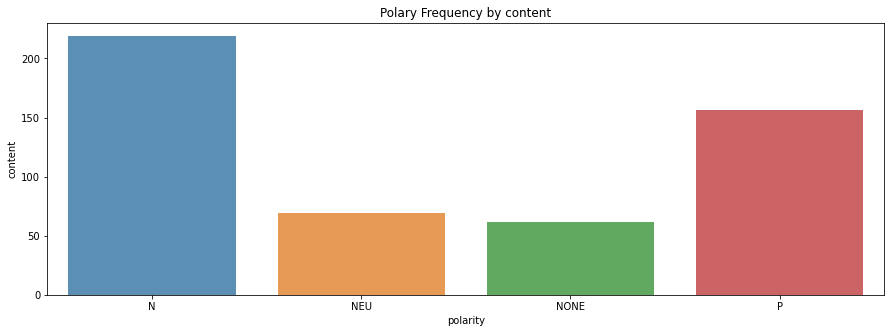

In [99]:
plt.figure(figsize=(15,5))
sns.barplot(tweet_by_polarity['polarity'].values, tweet_by_polarity['content'].values, alpha=0.8)
plt.title('Polary Frequency by content')
plt.ylabel('content', fontsize=10)
plt.xlabel('polarity', fontsize=10)
plt.show()

In [100]:
def features_lexical(text):
    text_tokenizer = TweetTokenizer()
    tokens_text = text_tokenizer.tokenize(text)
    return tokens_text

In [101]:
data = raw.values.tolist()
data

[[770976639173951488,
  'noseashetero',
  '@noseashetero 1000/10 de verdad a ti que voy a decir petarda que te quiero más que a mí mismo  ✨',
  '31/08/2016 13:28',
  'es',
  'P'],
 [771092421866389508,
  'Templelx',
  '@piscolabisaereo @HistoriaNG @SPosteguillo las tengo pero aún no las he leído. Caerán prontito ',
  '31/08/2016 21:08',
  'es',
  'P'],
 [771092111429083136,
  'esskuu94',
  'Al final han sido 3h  Bueno, mañana tengo fiesta así que.. No me quejo ',
  '31/08/2016 21:07',
  'es',
  'P'],
 [771092070572449796,
  '__ariadna9',
  '@Jorge_Ruiz14 yo no tengo tiempo para esas cosas ahora mismo ',
  '31/08/2016 21:07',
  'es',
  'N'],
 [771094192508600320,
  '_cristtina15_',
  '@_MissChaotic_ ves ese brillo? es un coso que hace que se sepan a kk ',
  '31/08/2016 21:15',
  'es',
  'N'],
 [771116956518875137,
  'JSorgex',
  'Tengo una perrina adorable... Sabéis que me acompaña hasta la a habitación cuando me voy a dormir? ',
  '31/08/2016 22:46',
  'es',
  'P'],
 [77111532488426291

# Features
- numero de carateres por tuit
- promedio ponderado sde carateres por tuit  (#cartares/240)
- numero menciones 
- numero emojis
- numero de palabras
- numero de caracteres especiales

In [102]:
data_dict = list()
for row in data:
    tokens = features_lexical(row[2])
    count_character = len(row[2])
    count_token = len(tokens)
    prom_character = 240 / count_character
    data_dict.append({'id':row[0], 'tuit': row[2], 'count_character': count_character, 'count_token': count_token, 'prom_character':  prom_character, 'polarity': row[5]})

In [103]:
data_dict

[{'id': 770976639173951488,
  'tuit': '@noseashetero 1000/10 de verdad a ti que voy a decir petarda que te quiero más que a mí mismo  ✨',
  'count_character': 96,
  'count_token': 20,
  'prom_character': 2.5,
  'polarity': 'P'},
 {'id': 771092421866389508,
  'tuit': '@piscolabisaereo @HistoriaNG @SPosteguillo las tengo pero aún no las he leído. Caerán prontito ',
  'count_character': 95,
  'count_token': 14,
  'prom_character': 2.526315789473684,
  'polarity': 'P'},
 {'id': 771092111429083136,
  'tuit': 'Al final han sido 3h  Bueno, mañana tengo fiesta así que.. No me quejo ',
  'count_character': 71,
  'count_token': 16,
  'prom_character': 3.380281690140845,
  'polarity': 'P'},
 {'id': 771092070572449796,
  'tuit': '@Jorge_Ruiz14 yo no tengo tiempo para esas cosas ahora mismo ',
  'count_character': 61,
  'count_token': 10,
  'prom_character': 3.9344262295081966,
  'polarity': 'N'},
 {'id': 771094192508600320,
  'tuit': '@_MissChaotic_ ves ese brillo? es un coso que hace que se sepan

In [104]:
x = [[r['count_character'], r['count_token'], r['prom_character']] for r in data_dict]

In [105]:
x

[[96, 20, 2.5],
 [95, 14, 2.526315789473684],
 [71, 16, 3.380281690140845],
 [61, 10, 3.9344262295081966],
 [69, 15, 3.4782608695652173],
 [99, 19, 2.4242424242424243],
 [92, 16, 2.608695652173913],
 [83, 15, 2.891566265060241],
 [76, 16, 3.1578947368421053],
 [87, 17, 2.7586206896551726],
 [70, 18, 3.4285714285714284],
 [94, 17, 2.5531914893617023],
 [80, 15, 3.0],
 [75, 12, 3.2],
 [82, 21, 2.926829268292683],
 [86, 16, 2.7906976744186047],
 [96, 21, 2.5],
 [69, 12, 3.4782608695652173],
 [95, 24, 2.526315789473684],
 [51, 9, 4.705882352941177],
 [91, 18, 2.6373626373626373],
 [90, 15, 2.6666666666666665],
 [93, 17, 2.5806451612903225],
 [72, 16, 3.3333333333333335],
 [72, 13, 3.3333333333333335],
 [62, 11, 3.870967741935484],
 [100, 19, 2.4],
 [68, 13, 3.5294117647058822],
 [64, 13, 3.75],
 [76, 16, 3.1578947368421053],
 [55, 10, 4.363636363636363],
 [62, 10, 3.870967741935484],
 [52, 8, 4.615384615384615],
 [63, 8, 3.8095238095238093],
 [42, 7, 5.714285714285714],
 [89, 15, 2.6966292

In [106]:
polarity = [r['polarity'] for r in data_dict]
labelencoder= LabelEncoder()

In [107]:
y =  labelencoder.fit_transform(polarity)
y

array([3, 3, 3, 0, 0, 3, 1, 2, 2, 3, 3, 2, 0, 2, 2, 0, 3, 3, 3, 0, 0, 1,
       0, 0, 0, 0, 1, 3, 1, 3, 0, 0, 1, 2, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3,
       1, 3, 3, 1, 0, 3, 3, 3, 0, 0, 3, 1, 0, 0, 0, 3, 0, 2, 0, 3, 0, 3,
       2, 0, 3, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       1, 3, 0, 3, 0, 0, 0, 0, 1, 3, 0, 1, 1, 2, 0, 1, 3, 3, 0, 3, 3, 1,
       3, 3, 0, 0, 1, 0, 3, 0, 0, 0, 1, 3, 0, 1, 3, 1, 3, 2, 1, 1, 0, 2,
       1, 3, 3, 3, 1, 0, 0, 0, 3, 3, 1, 3, 3, 0, 3, 3, 0, 3, 0, 1, 0, 2,
       2, 0, 3, 2, 1, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 2, 3, 3,
       0, 2, 0, 3, 1, 3, 1, 0, 0, 2, 0, 2, 0, 0, 1, 2, 3, 3, 3, 1, 3, 3,
       0, 1, 3, 3, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 2, 3, 3, 3, 0, 1, 3,
       0, 0, 2, 3, 0, 3, 3, 1, 2, 3, 3, 3, 0, 0, 3, 0, 3, 2, 0, 0, 0, 2,
       0, 0, 0, 3, 1, 0, 3, 0, 3, 2, 3, 0, 0, 3, 3, 0, 0, 3, 0, 1, 0, 3,
       3, 2, 0, 0, 2, 3, 2, 1, 3, 3, 2, 3, 0, 1, 1, 0, 0, 2, 1, 0, 3, 1,
       1, 3, 0, 0, 1, 2, 2, 2, 2, 3, 0, 0, 0, 3, 0,

In [108]:
x = preprocessing.normalize(x)
x

array([[0.97866243, 0.20388801, 0.025486  ],
       [0.9889728 , 0.14574336, 0.02629955],
       [0.97448566, 0.2196024 , 0.04639487],
       ...,
       [0.9477253 , 0.21400249, 0.23668478],
       [0.97110845, 0.21800394, 0.0970704 ],
       [0.9598138 , 0.19760872, 0.1992693 ]])

In [109]:
# Split the data into training/testing sets
x_train = x[:-20]
x_test = x[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

In [110]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x_train, y_train)

LinearRegression()

In [111]:
# Make predictions using the testing set
y_pred = regr.predict(x_test)
y_pred

array([0.75958655, 1.01237705, 1.06152168, 1.01244057, 0.92333526,
       0.92655802, 1.14745894, 0.74123726, 1.1144684 , 1.13799831,
       1.04440572, 1.20024028, 1.08367466, 1.11278938, 1.07929648,
       0.94226789, 1.06152168, 0.78325093, 0.96017874, 0.87382155])

In [112]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-18.4801356   -8.63082862  -4.60974974]
Mean squared error: 1.33
Coefficient of determination: -0.05
